In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
import requests
from io import BytesIO
from IPython.display import display
from PIL import Image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [2]:
db_connection = create_engine('sqlite:///database.db')

query1 = "SELECT * FROM lego_main"
query2 = "SELECT * FROM lego_prices"
query3 = "SELECT * FROM lego_availibity"
query4 = "SELECT * FROM lego_pictures"

main = pd.read_sql(query1, con=db_connection)
prices = pd.read_sql(query2, con=db_connection)
availibity = pd.read_sql(query3, con=db_connection)
pictures = pd.read_sql(query4, con=db_connection)
# print(main.head())
# print(prices.head())
# print(availibity.head())
# print(pictures.head())

## Price vs. Pieces

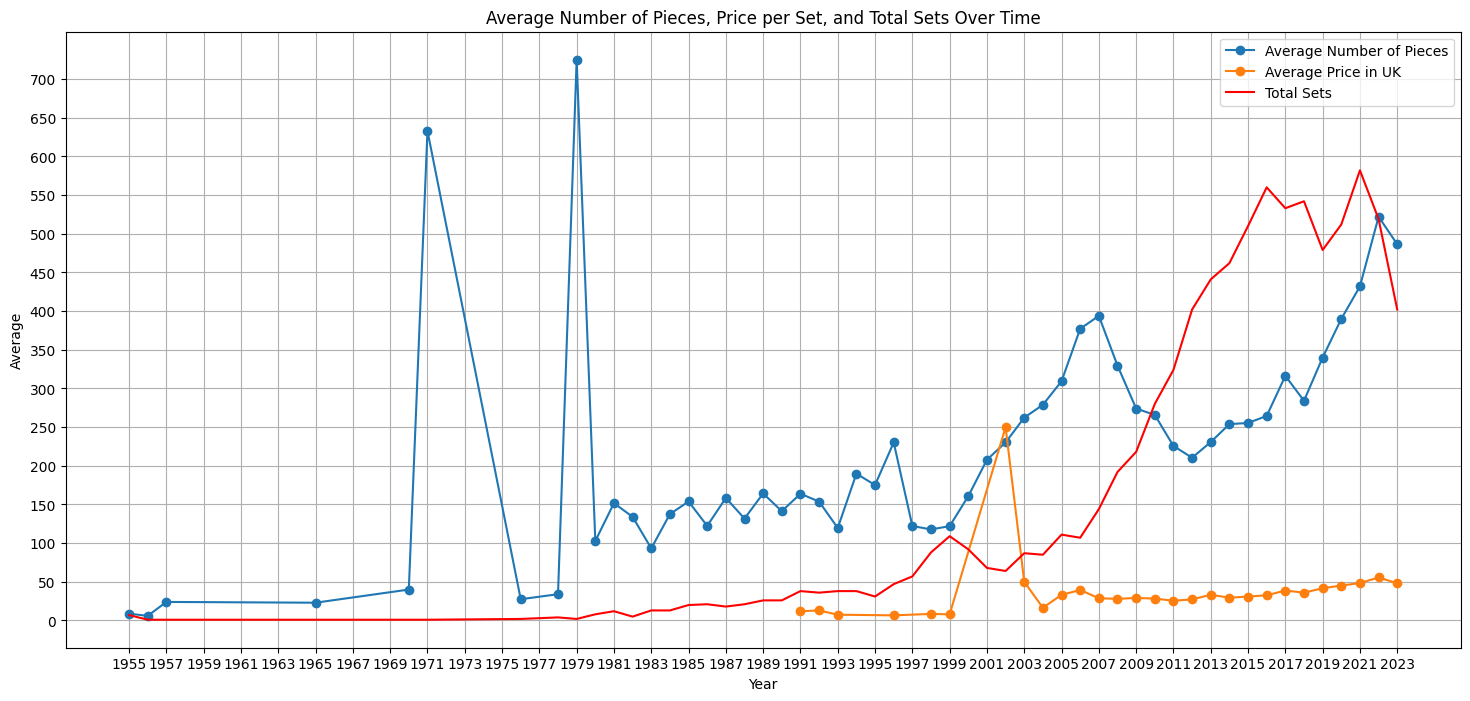

In [3]:
plt.figure(figsize=(18, 8))
avg_pieces_per_year = main.groupby('year')['pieces'].mean()
plt.plot(avg_pieces_per_year.index, avg_pieces_per_year.values, label='Average Number of Pieces', marker='o')

merged_data = pd.merge(main, prices, on='setID')
filtered_data = merged_data.dropna(subset=['UK_retailPrice']).copy()
filtered_data['US_retailPrice'] = pd.to_numeric(filtered_data['UK_retailPrice'], errors='coerce')


avg_price_per_year = filtered_data.groupby('year')['UK_retailPrice'].mean()
plt.plot(avg_price_per_year.index, avg_price_per_year.values, label='Average Price in UK', marker='o')


total_sets_per_year = main.groupby('year').size()
plt.plot(total_sets_per_year.index, total_sets_per_year.values, label='Total Sets', color='red')


plt.title('Average Number of Pieces, Price per Set, and Total Sets Over Time')
plt.xlabel('Year')
plt.ylabel('Average')
plt.yticks(np.arange(0, 750, 50))
plt.xticks(np.arange(min(avg_pieces_per_year.index), max(avg_pieces_per_year.index)+1, 2))
plt.grid(True)
plt.legend()

plt.show()


<Figure size 1800x800 with 0 Axes>

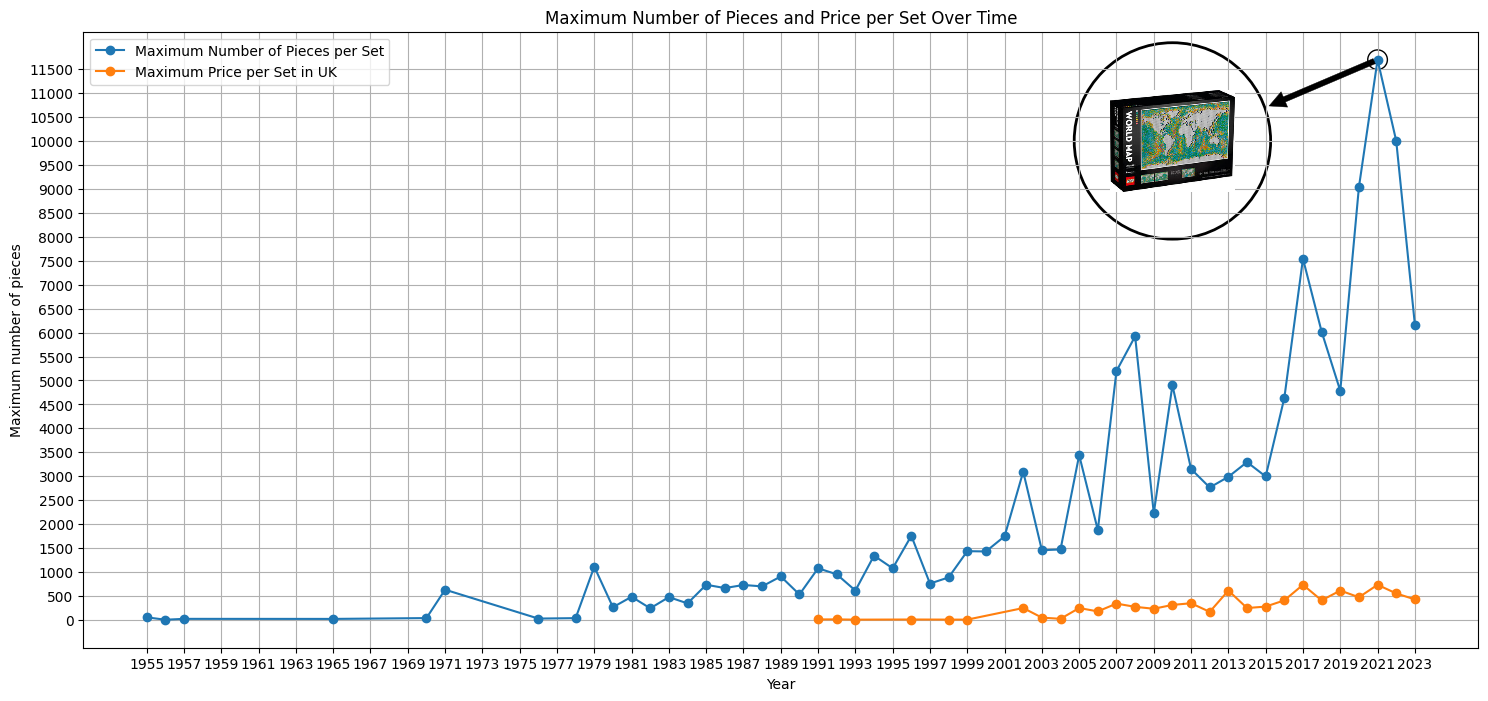

In [4]:

# Nacitanie obrazka MAX
max_pieces = main['pieces'].max()
max_set = main.loc[main['pieces'] == max_pieces]
max_year = max_set['year'].values[0]
max_set_id = max_set['setID'].item()
picture_url = pictures.loc[pictures['setID'] == max_set_id, 'urlPicture'].item()
response = requests.get(picture_url)
response.raise_for_status()
img1 = Image.open(BytesIO(response.content))

# Nakreslenie grafu
plt.figure(figsize=(18, 8))
fig, ax = plt.subplots(figsize=(18, 8))

# Maximum počtu dielikov na set v čase
mx_pieces_per_year = main.groupby('year')['pieces'].max()
line1, = plt.plot(mx_pieces_per_year.index, mx_pieces_per_year.values, label='Maximum Number of Pieces per Set', marker='o')

# Priemer ceny setu v čase
avg_price_per_year = filtered_data.groupby('year')['UK_retailPrice'].max()
line2, = plt.plot(avg_price_per_year.index, avg_price_per_year.values, label='Maximum Price per Set in UK', marker='o')

#MAX
plt.scatter(max_year, max_pieces, s=200, marker='o', color='black', facecolors='none', linewidths=1)
imagebox = OffsetImage(img1, zoom=0.3)
ab = AnnotationBbox(imagebox, (2010, 10000), frameon=False)
ax.add_artist(ab)
plt.scatter(2010, 10000, s=20000, marker='o', color='black', facecolors='none', linewidths=2)
ax.annotate('', xy=(2015, 10700), xytext=(max_year, max_pieces), arrowprops=dict(facecolor='black', shrink=0.03, linewidth=0.3))
legend_label_max_point = f'Max Pieces\nWinner set:\nMax Pieces: {max_pieces}\nYear: {max_year}\nSet Name: {max_set["name"].item()}'


plt.title('Maximum Number of Pieces and Price per Set Over Time')
plt.xlabel('Year')
plt.ylabel('Maximum number of pieces')
plt.yticks(np.arange(0, 12000, 500))
plt.xticks(np.arange(min(mx_pieces_per_year.index), max(mx_pieces_per_year.index) + 1, 2))
plt.grid(True)
plt.legend(handles=[line1, line2])
plt.show()


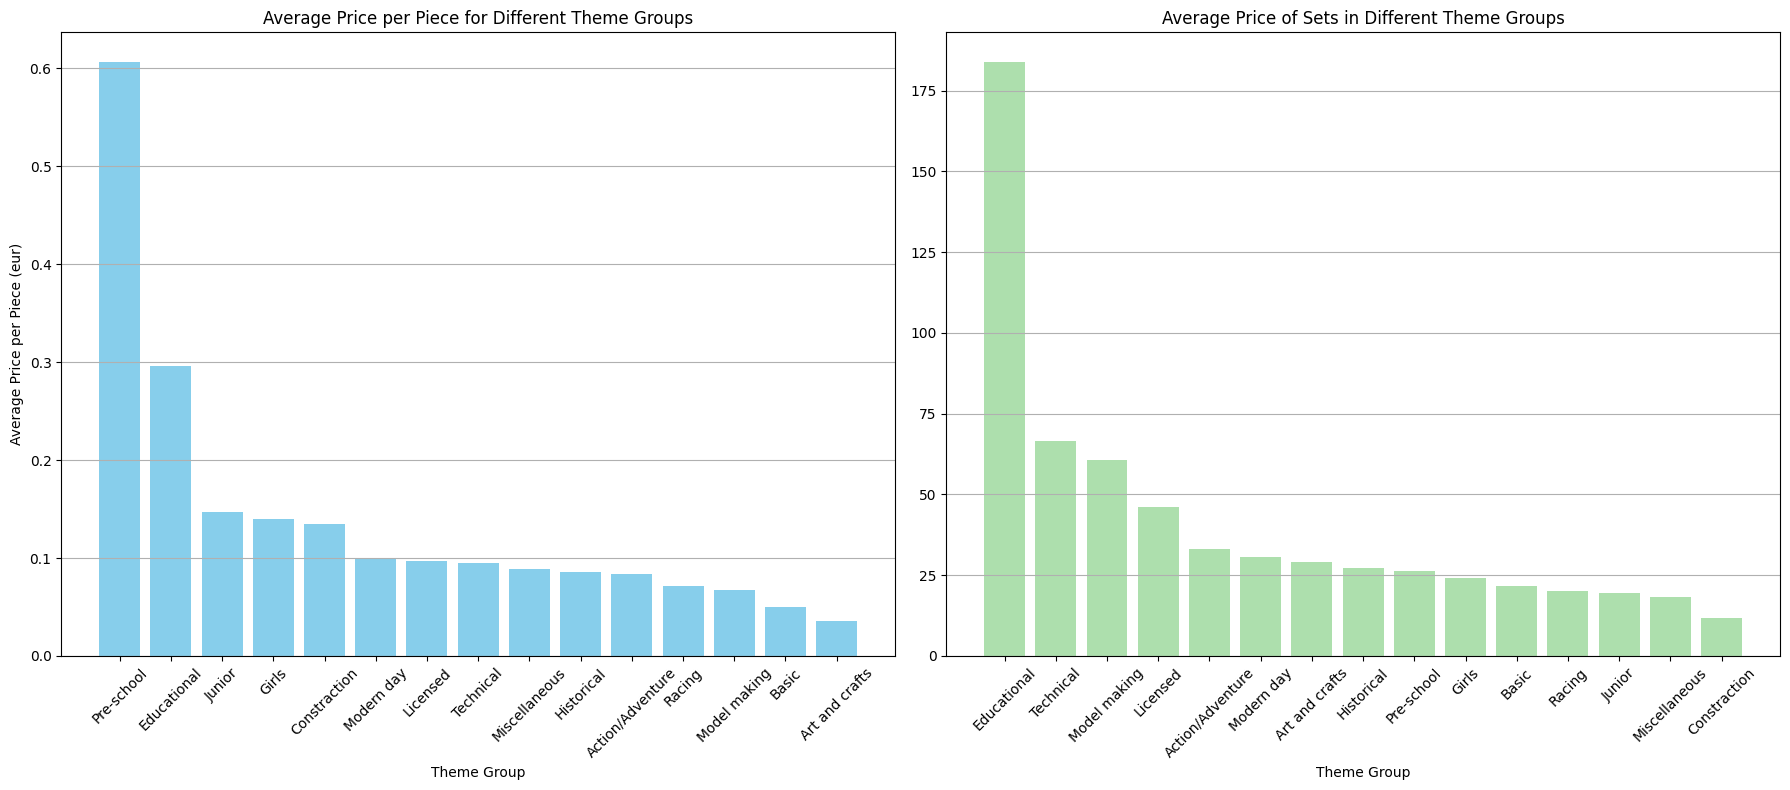

In [5]:

grouped_data = filtered_data.groupby('themeGroup')

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

#1
avg_price_per_piece = grouped_data['UK_retailPrice'].mean() / grouped_data['pieces'].mean()
sorted_avg_price_per_piece = avg_price_per_piece.sort_values(ascending=False)
axs[0].bar(sorted_avg_price_per_piece.index, sorted_avg_price_per_piece, color='skyblue')
axs[0].set_title('Average Price per Piece for Different Theme Groups')
axs[0].set_xlabel('Theme Group')
axs[0].set_ylabel('Average Price per Piece (eur)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

#2
avg_price_per_category = filtered_data.groupby('themeGroup')['UK_retailPrice'].sum() / filtered_data.groupby('themeGroup').size()
sorted_avg_price_per_category = avg_price_per_category.sort_values(ascending=False)
axs[1].bar(sorted_avg_price_per_category.index, sorted_avg_price_per_category, color='#ADDFAD')
axs[1].set_title('Average Price of Sets in Different Theme Groups')
axs[1].set_xlabel('Theme Group')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()



[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x250 at 0x1F3DEF02930>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225 at 0x1F3DEFB79E0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=283x250 at 0x1F3DD049220>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225 at 0x1F3DDD97A10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x243 at 0x1F3DEE97DD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225 at 0x1F3DEED94F0>]
Top 10 najdrahších pre-school setov na dielik:
      setID  theme                        name actualprice  pieces  \
444   32479  Duplo  DUPLO Green Building Plate       16.33     1.0   
8157    856  Duplo        Large Building Plate       15.16     1.0   
7235   4737  Duplo                      Points       11.66     2.0   
36    34432  Duplo              Growing Carrot       10.73     2.0   
7847    827  Duplo             Building Plates        10.5     3.0   
5624   9034  Duplo             Building 

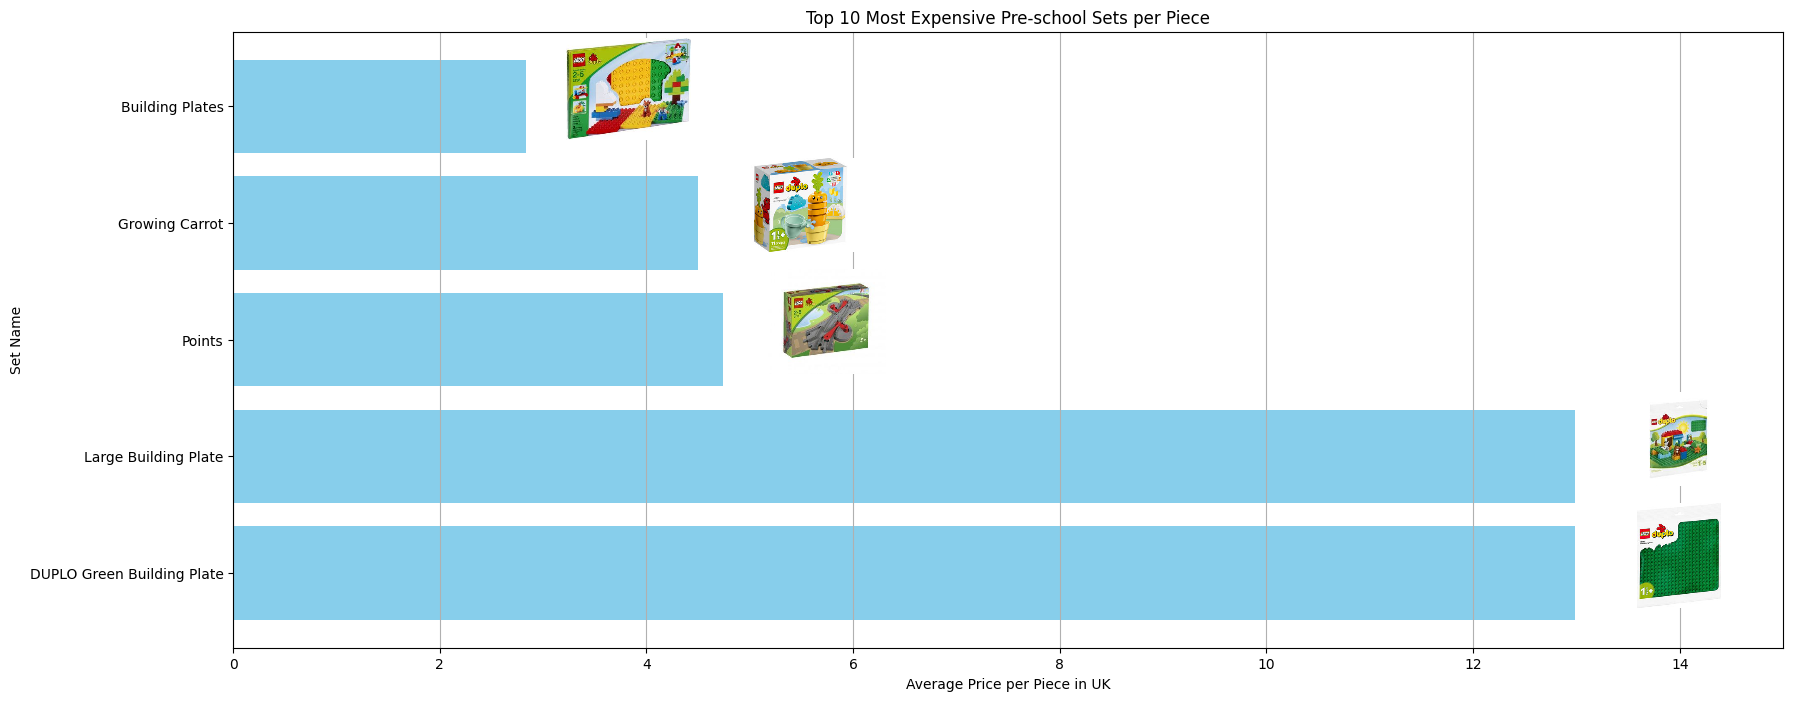

In [5]:
pre_school_data = filtered_data[(filtered_data['themeGroup'] == 'Pre-school')].copy()
pre_school_data['avg_price_per_piece'] = (pre_school_data['UK_retailPrice'] / pre_school_data['pieces']).copy()
top_10_pre_school_sets = pre_school_data.nlargest(6, 'avg_price_per_piece')
top_10_ids = top_10_pre_school_sets['setID']

list_images = []
for id in top_10_ids:
    picture_url = pictures.loc[pictures['setID'] == id, 'urlPicture'].item()
    if "noimage" in picture_url:
        list_images.append(0)  
    else:
        response = requests.get(picture_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        list_images.append(img)

print(list_images)
print("Top 10 najdrahších pre-school setov na dielik:")
print(top_10_pre_school_sets[['setID','theme', 'name', 'actualprice', 'pieces', 'avg_price_per_piece', 'year']])


fig, ax = plt.subplots(figsize = (20, 8))
bars = plt.barh(top_10_pre_school_sets['name'], top_10_pre_school_sets['avg_price_per_piece'],  color='skyblue')

bar_coords = []
for bar in bars:
    bar_coords.append((bar.get_width() +1  , bar.get_y() + bar.get_height() -0.25))


for idx, pic in enumerate(list_images[:5]):
    if pic != 0:
        imagebox = OffsetImage(pic, zoom=0.3)
        ab = AnnotationBbox(imagebox, (bar_coords[idx][0], bar_coords[idx][1]), frameon=False)
        ax.add_artist(ab)


plt.title('Top 10 Most Expensive Pre-school Sets per Piece')
plt.xlabel('Average Price per Piece in UK')
plt.ylabel('Set Name')
plt.xlim(0, 15) 
plt.grid(axis='x')
plt.show()


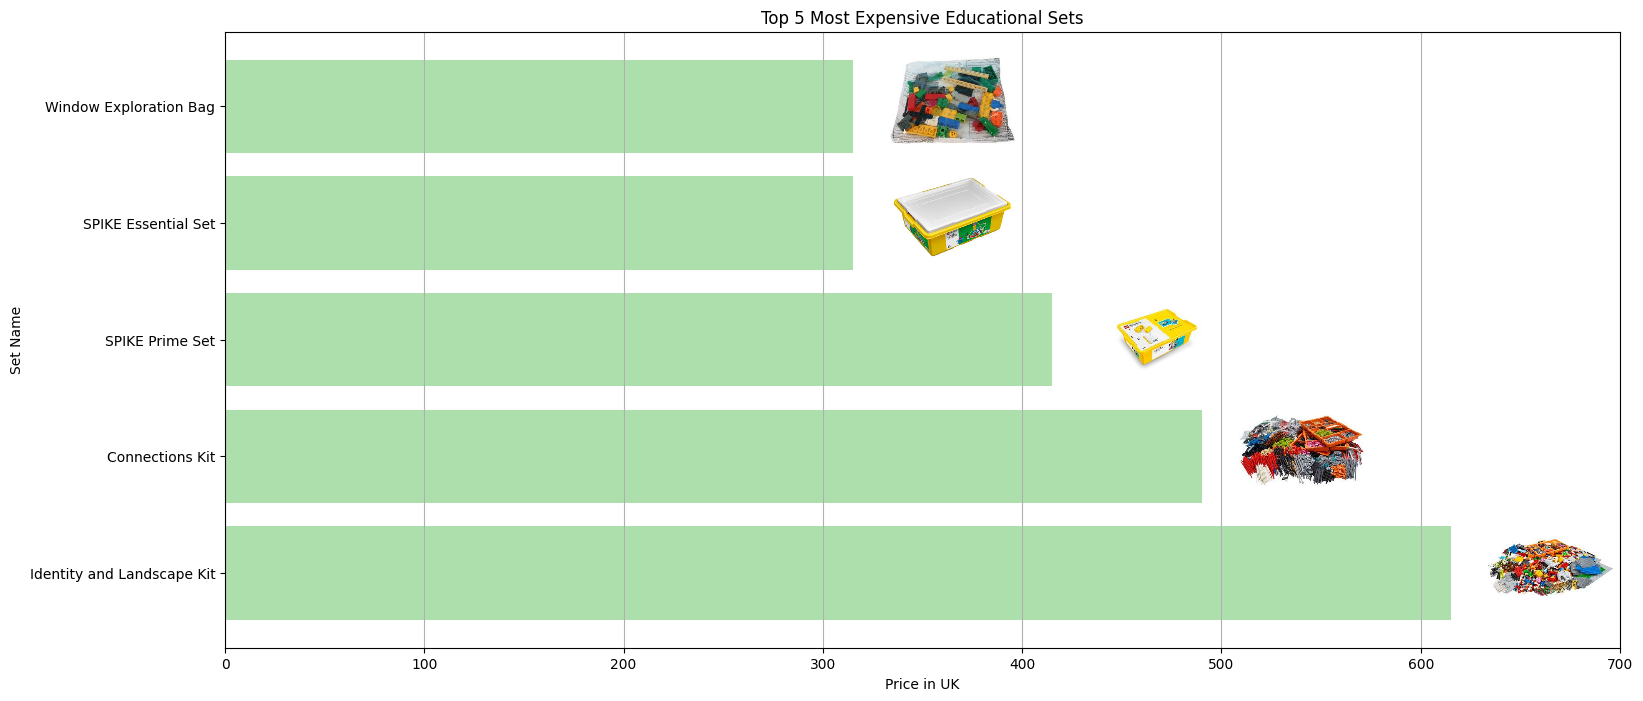

In [7]:
top_5_expensive_sets = filtered_data[filtered_data['themeGroup'] == 'Educational'].nlargest(5, 'UK_retailPrice').sort_values(by='UK_retailPrice', ascending=False)
top_5_ids = top_5_expensive_sets['setID']


list_images = []
for id in top_5_ids:
    picture_url = pictures.loc[pictures['setID'] == id, 'urlPicture'].item()
    if "noimage" in picture_url or id == 345:
        list_images.append(0)
    else:
        response = requests.get(picture_url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        list_images.append(img)

fig, ax = plt.subplots(figsize=(18, 8))
bars = plt.barh(top_5_expensive_sets['name'], top_5_expensive_sets['UK_retailPrice'], color='#ADDFAD')


bar_coords = []
for bar in bars:
    bar_coords.append((bar.get_width() +50 , bar.get_y() + bar.get_height() - 0.35))


for idx, pic in enumerate(list_images):
    if pic != 0:
        imagebox = OffsetImage(pic, zoom=0.3)
        ab = AnnotationBbox(imagebox, (bar_coords[idx][0], bar_coords[idx][1]), frameon=False)
        ax.add_artist(ab)

plt.title('Top 5 Most Expensive Educational Sets')
plt.xlabel('Price in UK')
plt.ylabel('Set Name')
plt.xlim(0, 700) 
plt.grid(axis='x')
plt.show()


## Price and Min age

<Figure size 1800x800 with 0 Axes>

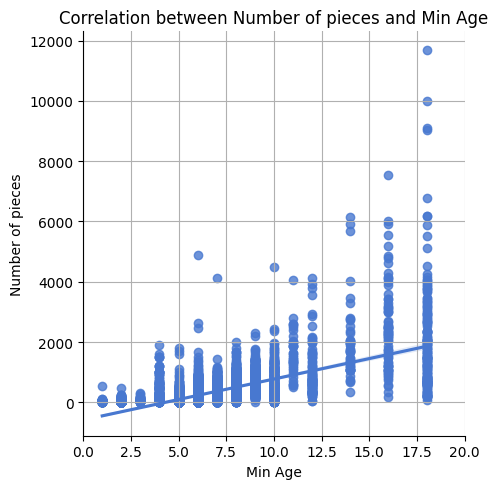

In [8]:
plt.figure(figsize=(18, 8))
sns.set_palette("muted") 
sns.lmplot(y='pieces', x='minAge', data=main, palette='skyblue')
plt.title('Correlation between Number of pieces and Min Age')
plt.ylabel('Number of pieces')
plt.xlabel('Min Age')
plt.grid(True)
plt.xlim(0, 20)
plt.tight_layout()
plt.show()


In [6]:
minifigs_count = main['minifigs'].sum()
print(f'Total number of values in the "minifigs" column: {minifigs_count}')

Total number of values in the "minifigs" column: 17916.0


## TOP themes

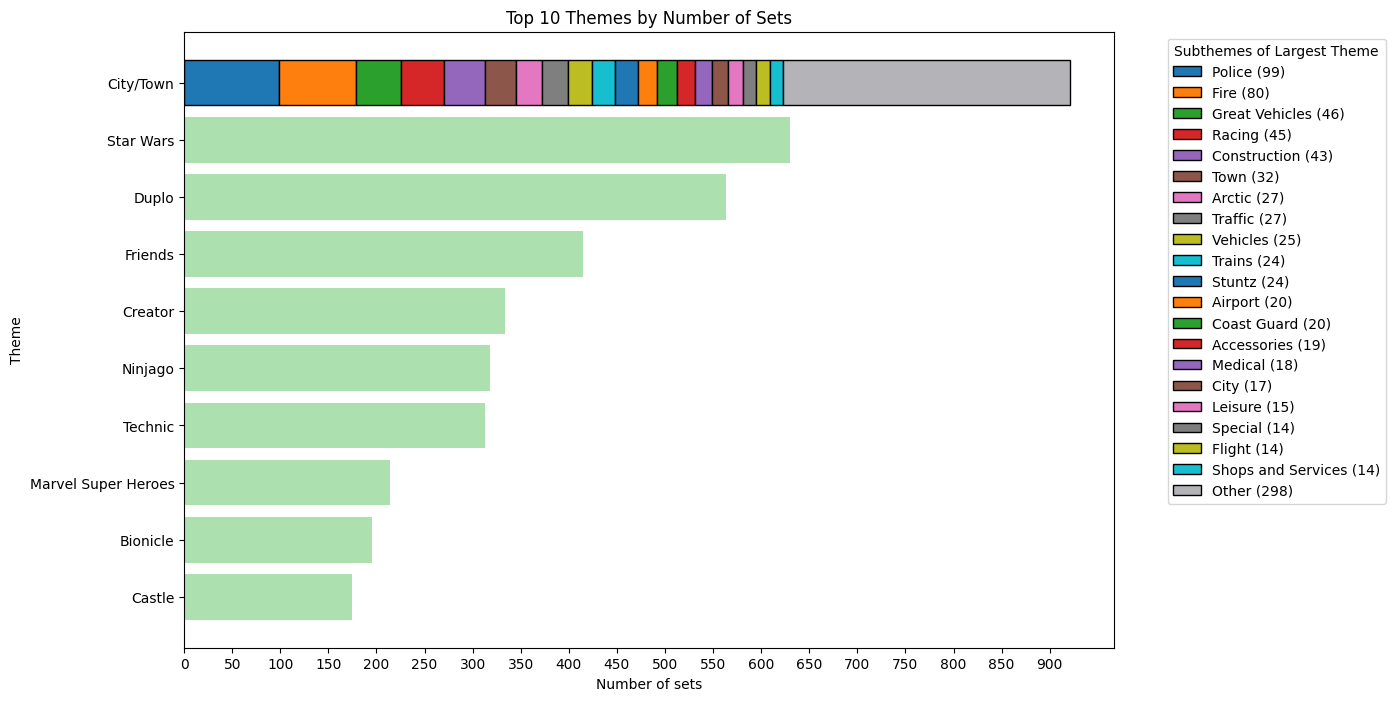

Celkový počet setů v tématech 'City' a 'Town': 921


In [12]:
# vytvorenie noveho zoskupenia dat podla historie
main_town_city = main.copy()
main_town_city['theme'] = main_town_city['theme'].replace({'City': 'City/Town', 'Town': 'City/Town'})

theme_counts = main_town_city['theme'].value_counts()

# 'Collectable Minifigures' uprava
if 'Collectable Minifigures' in theme_counts.index:
    unique_collectable_subthemes = main_town_city[main_town_city['theme'] == 'Collectable Minifigures']['subtheme'].unique()
    collectable_subtheme_count = len(unique_collectable_subthemes)
    theme_counts.at['Collectable Minifigures'] = collectable_subtheme_count

#top 10
top_10_themes = theme_counts.nlargest(n=10)
largest_theme = top_10_themes.idxmax()
largest_theme_data = main_town_city[main_town_city['theme'] == largest_theme]

#top subtem
top_subthemes_largest = largest_theme_data['subtheme'].value_counts().nlargest(20)
other_subthemes_count = largest_theme_data[~largest_theme_data['subtheme'].isin(top_subthemes_largest.index)].shape[0]

# osttn casti grafu
colors = ['#FF5733' if theme == largest_theme else '#ACE1AF' for theme in top_10_themes.index]
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_themes.index, top_10_themes.values, color=colors)

# top 1
bottom_largest = 0
for subtheme, count in top_subthemes_largest.items():
    plt.barh(largest_theme, count, left=bottom_largest, label=f'{subtheme} ({count})', edgecolor='black')
    bottom_largest += count

plt.barh(largest_theme, other_subthemes_count, left=bottom_largest, color='#B4B4B8', label=f'Other ({other_subthemes_count})', edgecolor='black')

plt.xlabel("Number of sets")
plt.ylabel("Theme")
plt.xticks(np.arange(0, 950, 50))
plt.title("Top 10 Themes by Number of Sets")
plt.legend(title='Subthemes of Largest Theme', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

city_town_count = main[main['theme'].isin(['City', 'Town'])].shape[0]
print(f"Celkový počet setů v tématech 'City' a 'Town': {city_town_count}")


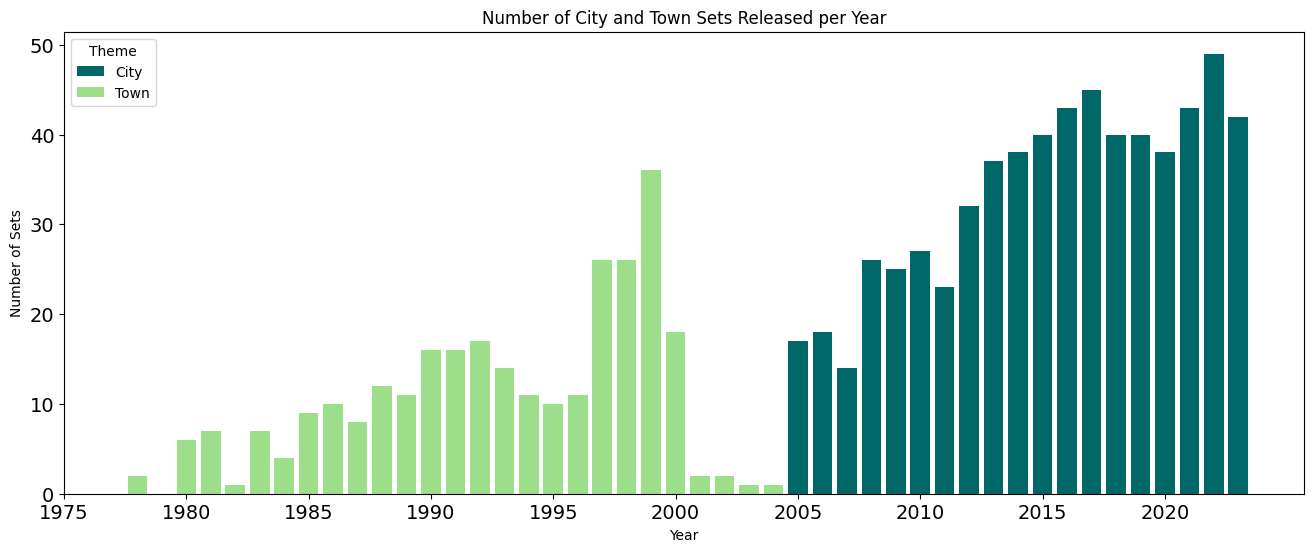

Priemerný minimálny vek pre tému 'City' je: 5.30 rokov


In [46]:

# lego city sa pred rokom 2005 volalo lego town 
# lego castle and lego space

sets_per_year_city = main[main['theme'] == 'City'].groupby('year').size()
sets_per_year_town = main[main['theme'] == 'Town'].groupby('year').size()

plt.figure(figsize=(16, 6))
plt.bar(sets_per_year_city.index, sets_per_year_city.values, color='#006769', label='City')
plt.bar(sets_per_year_town.index, sets_per_year_town.values, color='#9DDE8B', label='Town')

plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of City and Town Sets Released per Year")
plt.legend(title='Theme')
plt.xticks(np.arange(1975, 2023 , 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


#priemerny min age
city_data = main[main['theme'] == 'City']
average_min_age = city_data['minAge'].mean()
print(f"Priemerný minimálny vek pre tému 'City' je: {average_min_age:.2f} rokov")



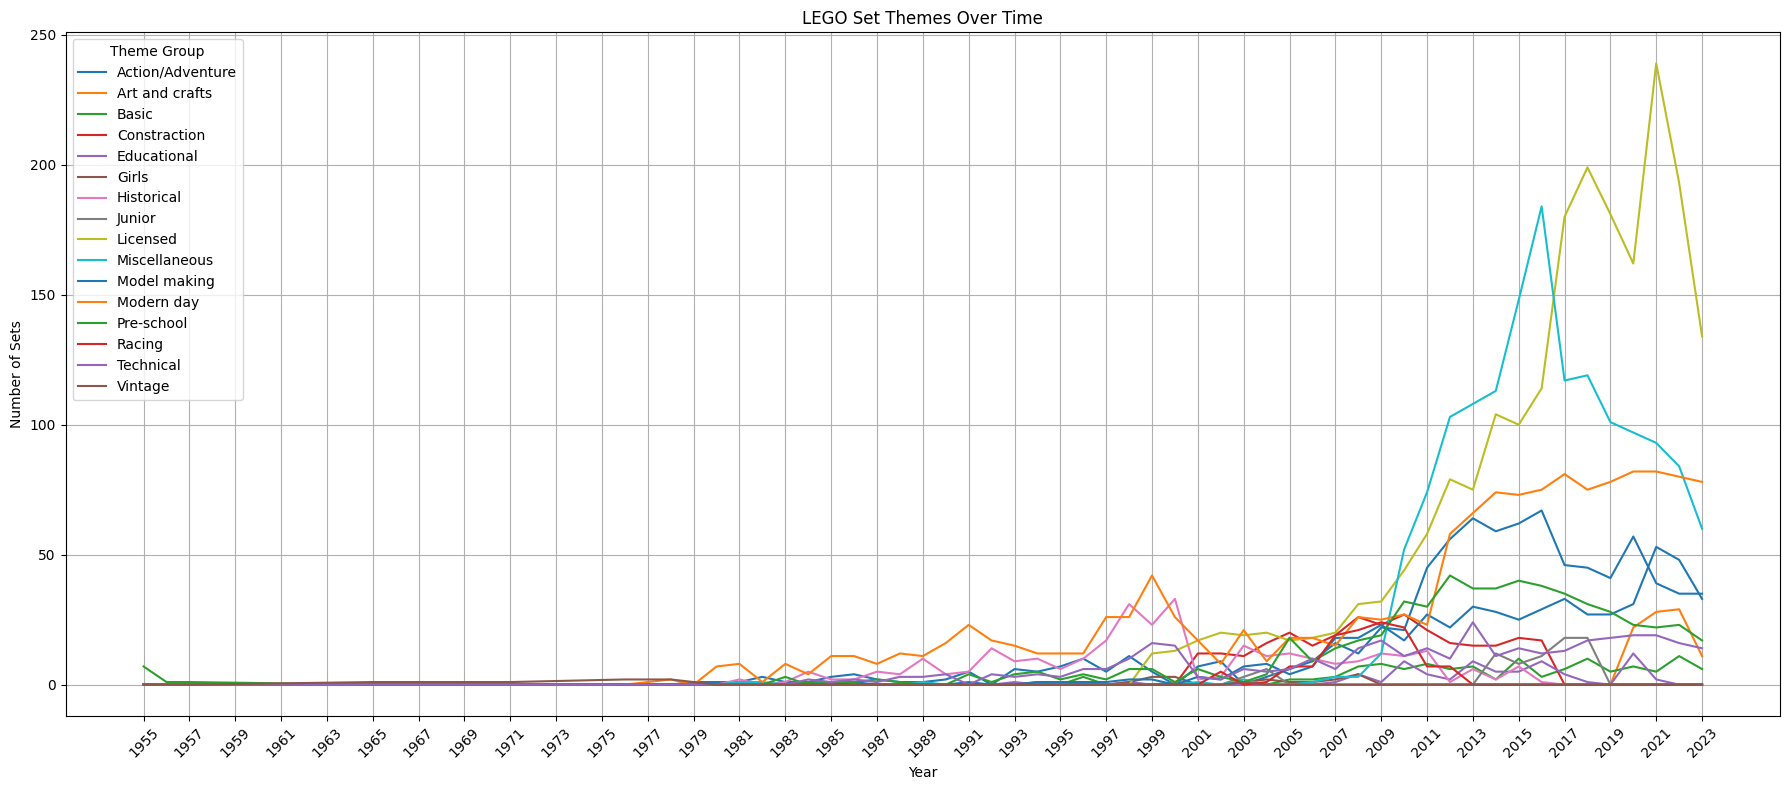

In [47]:
theme_data = main[['year', 'themeGroup']]

theme_counts = theme_data.groupby(['year', 'themeGroup']).size().unstack(fill_value=0)
plt.figure(figsize=(18, 8))

#okrem outsideru
for theme_group in theme_counts.columns:
        plt.plot(theme_counts.index, theme_counts[theme_group], label=theme_group)


plt.title('LEGO Set Themes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.legend(title='Theme Group')
plt.grid(True)
plt.xticks(np.arange(min(avg_pieces_per_year.index), max(avg_pieces_per_year.index)+1, 2))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

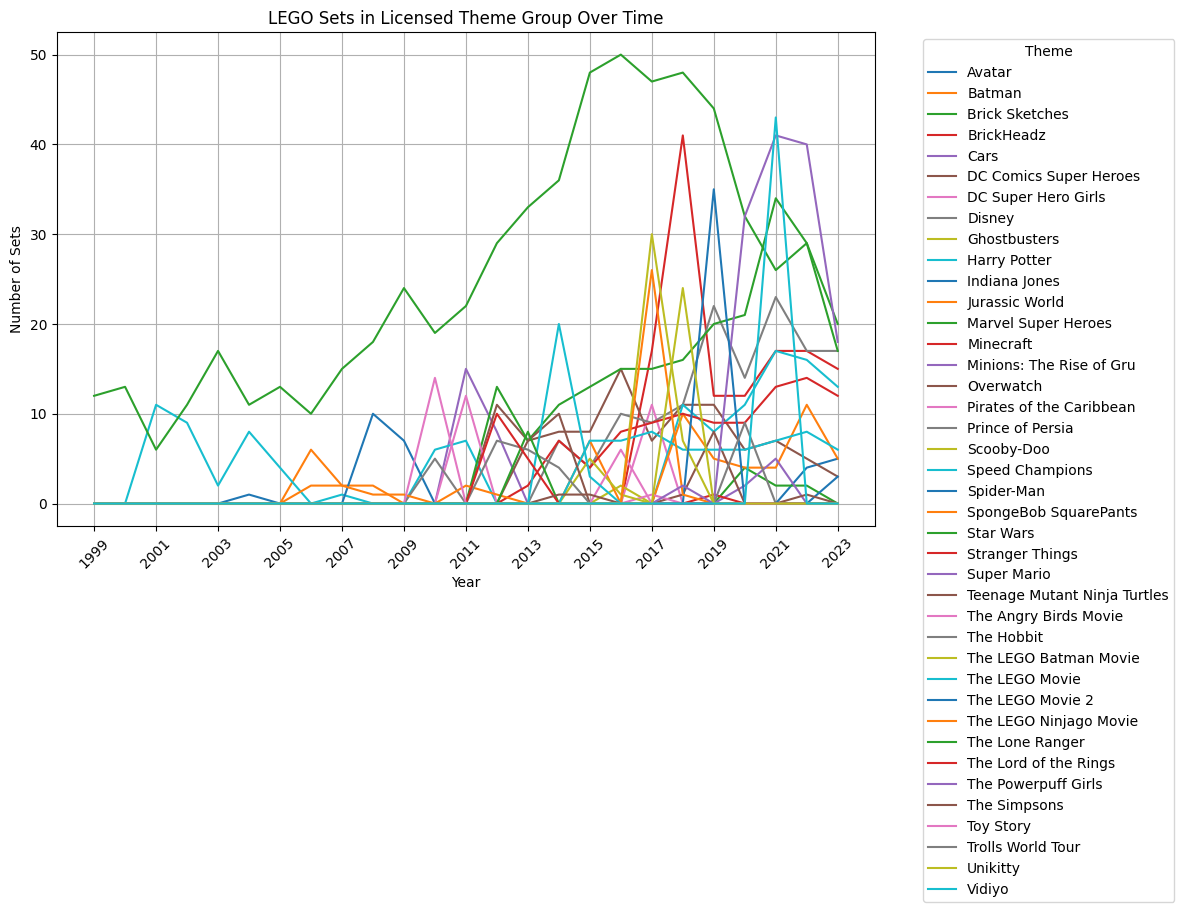

In [48]:

miscellaneous_themes = main[main['themeGroup'] == 'Licensed']
theme_counts = miscellaneous_themes.groupby(['year', 'theme']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))

for theme in theme_counts.columns:
    plt.plot(theme_counts.index, theme_counts[theme], label=theme)


plt.title('LEGO Sets in Licensed Theme Group Over Time')


plt.xticks(np.arange(min(miscellaneous_themes['year']), max(miscellaneous_themes['year'])+1, 2))
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## number of pieces and theme group

C:\Users\jjpol\AppData\Local\Temp\ipykernel_15704\475714526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='themeGroup', y='pieces', data=main, palette='Set3')


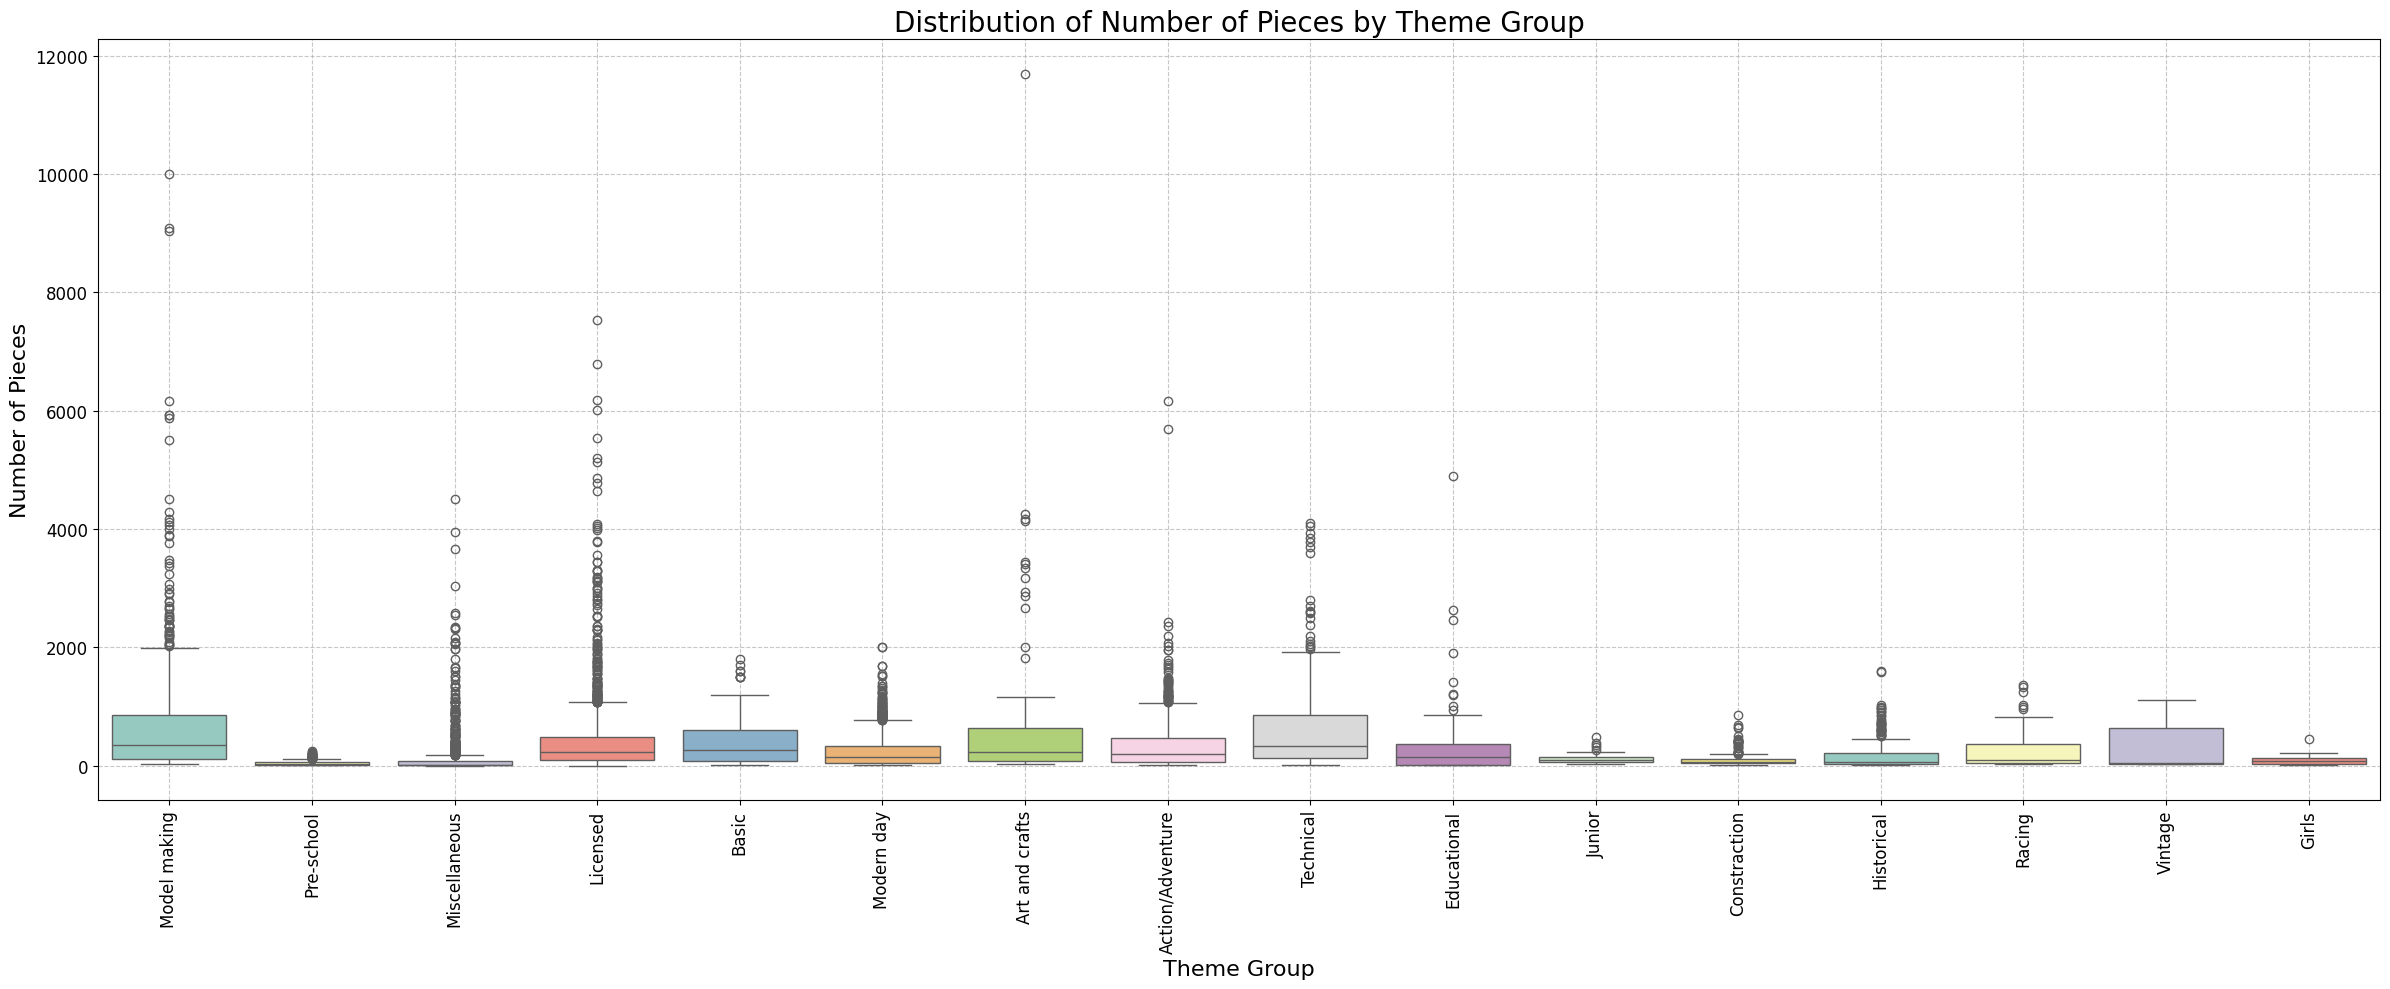

In [12]:
plt.figure(figsize=(24, 10)) 

sns.boxplot(x='themeGroup', y='pieces', data=main, palette='Set3')

plt.title('Distribution of Number of Pieces by Theme Group', fontsize=20)
plt.xlabel('Theme Group', fontsize=16)
plt.ylabel('Number of Pieces', fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
model_making_themes = main[main['themeGroup'] == 'Model making']['theme'].unique()

print("Temy kde sa subthema rovna 'model making':")
for theme in model_making_themes:
    print(theme)

average_min_age = main[main['themeGroup'] == 'Model making']['minAge'].mean()
print("Priemerný vek pre skupinu s témami 'Model making':", average_min_age)


Temy kde sa subthema rovna 'model making':
Icons
Creator
Architecture
Bricklink
Creator Expert
Advanced models
Model Team
Priemerný vek pre skupinu s témami 'Model making': 9.820267686424474


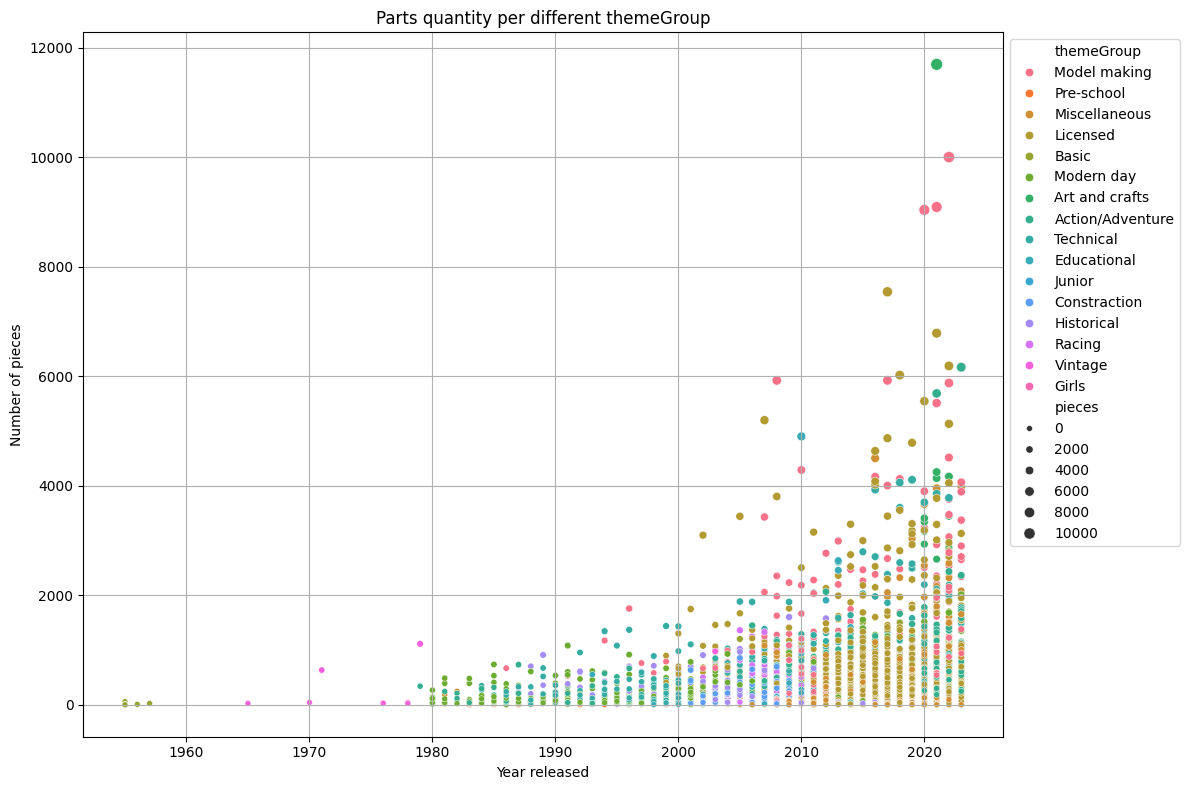

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='pieces', hue='themeGroup',  size='pieces', data=main)


plt.xlabel('Year released')
plt.ylabel('Number of pieces')
plt.title('Parts quantity per different themeGroup')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()


## First availibility in countries

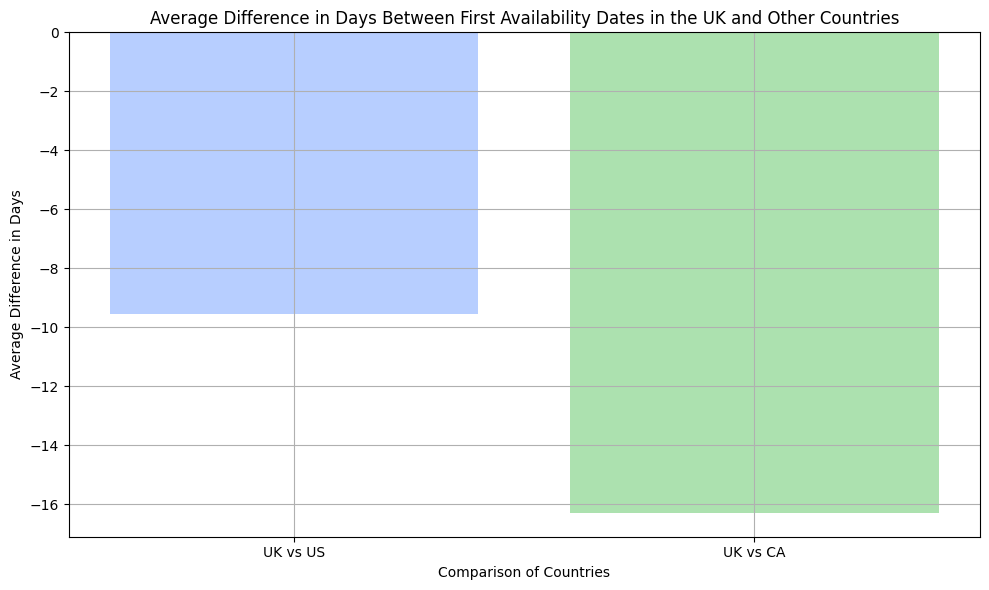

In [15]:
availability_comparison = pd.merge(availibity, prices, on='setID', how='inner')

for col in ['dateFirstAvailable_US', 'dateFirstAvailable_UK', 'dateFirstAvailable_CA']:
    availability_comparison[col] = pd.to_datetime(availability_comparison[col].str[:10], format='%Y-%m-%d')

#vypicet celeho rozdielu 
def calculate_total_diff(date1, date2):
    delta = relativedelta(date1, date2)
    total_days = delta.years * 365 + delta.months * 30 + delta.days
    return total_days

availability_comparison['UK_vs_US'] = availability_comparison.apply(
    lambda row: calculate_total_diff(row['dateFirstAvailable_UK'], row['dateFirstAvailable_US']), axis=1)
availability_comparison['UK_vs_CA'] = availability_comparison.apply(
    lambda row: calculate_total_diff(row['dateFirstAvailable_UK'], row['dateFirstAvailable_CA']), axis=1)


plt.figure(figsize=(10, 6))
plt.bar(['UK vs US', 'UK vs CA'],
        [availability_comparison['UK_vs_US'].mean(), 
         availability_comparison['UK_vs_CA'].mean(), ],
        color=['#b7ceff', '#ACE1AF'])

plt.xlabel('Comparison of Countries')
plt.ylabel('Average Difference in Days')
plt.title('Average Difference in Days Between First Availability Dates in the UK and Other Countries')
plt.grid(True)
plt.tight_layout()
plt.show()


    Month_UK   UK_vs_US
0          1  -3.107362
1          2   4.946667
2          3   6.493036
3          4   4.392157
4          5  -1.947977
5          6 -29.536030
6          7 -25.327434
7          8 -14.950673
8          9   3.662069
9         10  -5.251748
10        11   1.935897
11        12  -8.500000


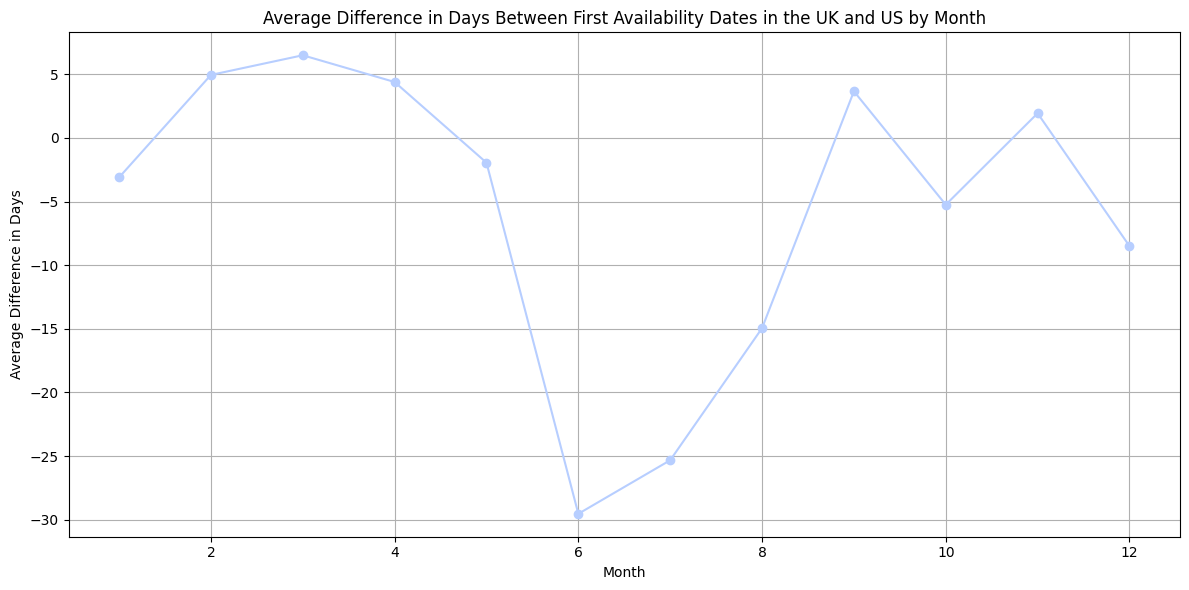

In [6]:

from dateutil.relativedelta import relativedelta

availability_comparison = pd.merge(availibity, prices,  on='setID', how='inner')
availability_comparison = pd.merge(availability_comparison, main,  on='setID', how='inner')

for col in ['dateFirstAvailable_US', 'dateFirstAvailable_UK']:
    availability_comparison[col] = pd.to_datetime(availability_comparison[col].str[:10], format='%Y-%m-%d')

#vypicet celeho rozdielu 
def calculate_total_diff(date1, date2):
    delta = relativedelta(date1, date2)
    total_days = delta.years * 365 + delta.months * 30 + delta.days
    return total_days

availability_comparison['UK_vs_US'] = availability_comparison.apply(
    lambda row: calculate_total_diff(row['dateFirstAvailable_UK'], row['dateFirstAvailable_US']), axis=1)

# print(availability_comparison['UK_vs_US'])

availability_comparison['Month_US'] = availability_comparison['dateFirstAvailable_US'].dt.month
availability_comparison['Month_UK'] = availability_comparison['dateFirstAvailable_UK'].dt.month
# print(availability_comparison['Month_US'])
# print(availability_comparison['Month_UK'] )

monthly_diff = availability_comparison.groupby('Month_UK')['UK_vs_US'].mean().reset_index()
print(monthly_diff)

# plt.figure(figsize=(10, 6))
# plt.bar(['UK vs US'],
#         [availability_comparison['UK_vs_US'].mean(),  ],
#         color=['#b7ceff', '#ACE1AF'])

plt.figure(figsize=(12, 6))
plt.plot(monthly_diff['Month_UK'] , monthly_diff['UK_vs_US'], marker='o', linestyle='-', color='#b7ceff')

plt.xlabel('Month')
plt.ylabel('Average Difference in Days')
plt.title('Average Difference in Days Between First Availability Dates in the UK and US by Month')
plt.grid(True)
plt.tight_layout()
plt.show()
